In [297]:
import numpy as np
import math
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib

matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

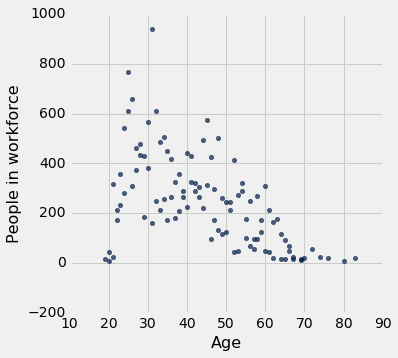

In [335]:
wages_actuary = Table.read_table('Data USA - Bar Chart of Wage Distribution for Actuaries-1.csv').drop([1,2,4,6]).relabeled("num_ppl","People in workforce").relabeled("wage_bin_name","Wage bin")
wages_pop = Table.read_table('Data USA - Bar Chart of Wage Distribution for Actuaries-2.csv').drop([1,2,4,6]).relabeled("num_ppl","People in workforce").relabeled("wage_bin_name","Wage bin")

age = Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').drop([1,2,4,7]).relabeled("num_ppl","People in workforce").relabeled("sex_name","Gender").relabeled("age","Age")
age_male = Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').take(range(0, 56)).drop([1,2,4]).relabeled("sex_name","Gender").relabeled("num_ppl","People in workforce")
age_female =  Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').take(range(57,104)).drop([1,2,4]).relabeled("sex_name","Gender").relabeled("num_ppl","People in workforce")

major =  Table.read_table('Data USA - Tree Map of Majors for Actuaries.csv').drop([1,2,4,5,6,8,9]).relabeled("num_ppl","People in workforce")\
        .relabeled("cip_name", "College Degree")

gender_with_degree = Table.read_table("Data USA - Bar Chart of Gender for Actuaries.csv").drop([2,4,6]).relabeled("cip_name", "College Degree").relabeled("num_ppl","People in workforce").relabeled("sex_name","Gender")


highest_paid = Table.read_table("Data USA - Bar Chart of Highest Paid for Actuaries.csv").drop([2,3,4,6,8]).relabeled(1,"Industry").relabeled("num_ppl","People in workforce").relabeled(3,"Average salary")
university = Table.read_table("Data USA - Tree Map of Universities for Actuaries.csv").drop([2,4]).relabeled("cip_name", "Majors").relabeled("grads_total","Degrees awards").relabeled("university_name","University")


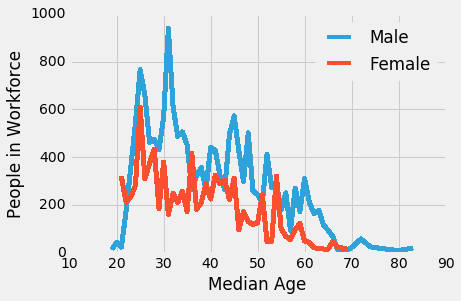

In [299]:
## The median age of Actuaries is 38.7, and Male employees are generally 0.622 years older 
## than than their Female counterparts.
#gender.drop([1,2]).relabeled("People in workforce sum","Labors in the workforce")
# the histogram of the data

line, = plt.plot(age_male.column(2), age_male.column(3), '-', label='Male')
line.set_antialiased(False) 
line, = plt.plot(age_female.column(2), age_female.column(3), '-', label='Female')
line.set_antialiased(False) 
plt.xlabel('Median Age')
plt.ylabel('People in Workforce')
plt.legend(loc= 'upper right')


In [300]:
## The highest paid industries for Actuaries, by average wage, are Management, scientific & technical consulting
## services; Securities, commodities, funds, trusts & other financial investments; and Insurance carriers & 
## related activities.
highest_paid.sort("Average salary",descending = True)


year,Industry,People in workforce,Average salary
2014,"Management, scientific & technical consulting services",5266,151097
2014,"Securities, commodities, funds, trusts & other financial ...",732,144705
2014,Insurance carriers & related activities,22967,123618
2014,Nondepository credit & related activities,503,84288.7


In [301]:
age_female

year,Gender,age,People in workforce,num_ppl_moe
2014,Female,21,319,382.358
2014,Female,22,212,170.579
2014,Female,23,234,138.993
2014,Female,24,282,149.677
2014,Female,25,609,296.585
2014,Female,26,310,163.498
2014,Female,27,373,196.863
2014,Female,28,433,184.707
2014,Female,29,185,98.3478
2014,Female,30,380,154.423


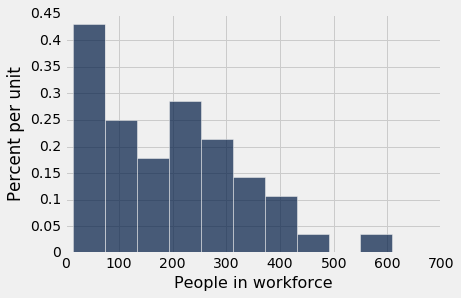

In [302]:
age_female.hist("People in workforce")

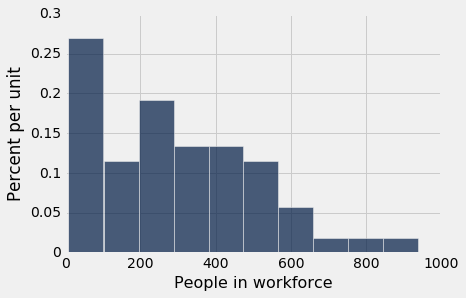

In [303]:
age_male.hist("People in workforce")

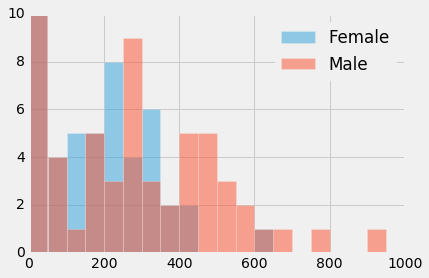

In [304]:
#Distribution of # of Female and Male in workforce
female = list(age_female.column(3))
male = list(age_male.column(3))

plt.hist(female, bins= np.arange(0,1000,50), alpha=0.5, label='Female')
plt.hist(male, bins= np.arange(0,1000,50), alpha=0.5, label='Male')
plt.legend(loc= 'upper right')
plt.show()



In [305]:
university

year,Majors,University,Degrees awards
2014,Computer and Information Sciences and Support Services,Corcoran College of Art and Design,4
2014,Computer and Information Sciences and Support Services,Winter Park Tech,28
2014,Computer and Information Sciences and Support Services,Withlacoochee Technical Institute,12
2014,Computer and Information Sciences and Support Services,Fortis Institute-Baltimore,11
2014,Computer and Information Sciences and Support Services,Alabama A & M University,17
2014,Computer and Information Sciences and Support Services,University of Alabama at Birmingham,50
2014,Computer and Information Sciences and Support Services,University of Alabama in Huntsville,73
2014,Computer and Information Sciences and Support Services,Alabama State University,46
2014,Computer and Information Sciences and Support Services,The University of Alabama,56
2014,Computer and Information Sciences and Support Services,Central Alabama Community College,4


In [306]:
#Explore the number of degrees awarded by each college and university in the 5 most common majors: 
university.group(1,sum).drop([1,2])

Majors,Degrees awards sum
Business,780914
Computer and Information Sciences and Support Services,159143
Engineering,154963
Math & Statistics,36350
Social Sciences,199424


In [307]:
university.where("University", "University of California-Berkeley")

year,Majors,University,Degrees awards
2014,Computer and Information Sciences and Support Services,University of California-Berkeley,351
2014,Engineering,University of California-Berkeley,1666
2014,Math & Statistics,University of California-Berkeley,509
2014,Social Sciences,University of California-Berkeley,1878
2014,Business,University of California-Berkeley,899


In [308]:
def most_degreeaward(year):
    return university.where('year', year).sort('Degrees awards', descending=True).show(8)
most_degreeaward(2014)

#This lead me to believe that these universities offers more online classes to lead to a degree

year,Majors,University,Degrees awards
2014,Business,University of Phoenix-Arizona,22396
2014,Business,Ashford University,7214
2014,Computer and Information Sciences and Support Services,University of Phoenix-Arizona,4973
2014,Business,DeVry University-Illinois,4473
2014,Business,University of Maryland-University College,4427
2014,Business,Webster University,4243
2014,Business,Florida International University,4218
2014,Business,American College of Financial Services,4146


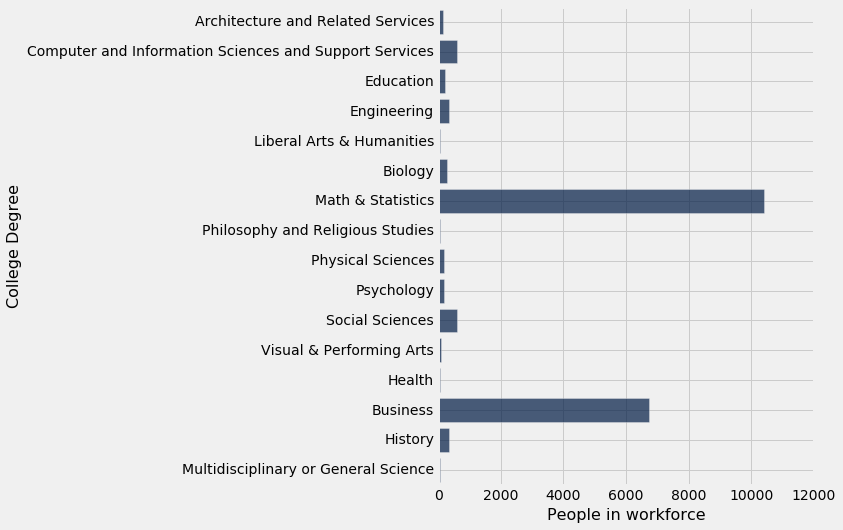

In [309]:
## The Department of Education and Census Bureau provide data on higher educational choices for Actuaries.
## Explore degrees and majors for Actuaries in the sections below.
major.select([1,2]).barh('College Degree')

In [310]:
# Analysis
print('Number of individuals:', sum(gender_with_degree.column(3)))
print('Number of individuals studies', gender_with_degree.group(1).column(0).item(0), ':', gender_with_degree.group(1,sum).column(3).item(0))
print('Number of individuals studies', gender_with_degree.group(1).column(0).item(1), ':', gender_with_degree.group(1,sum).column(3).item(1))
print('Number of individuals studies', gender_with_degree.group(1).column(0).item(2), ':', gender_with_degree.group(1,sum).column(3).item(2))
print('Number of individuals studies', gender_with_degree.group(1).column(0).item(3), ':', gender_with_degree.group(1,sum).column(3).item(3))
print('Number of individuals studies', gender_with_degree.group(1).column(0).item(4), ':', gender_with_degree.group(1,sum).column(3).item(4))

Number of individuals: 19515312
Number of individuals studies Business : 9997027
Number of individuals studies Computer and Information Sciences and Support Services : 1642351
Number of individuals studies Engineering : 3792716
Number of individuals studies Math & Statistics : 641072
Number of individuals studies Social Sciences : 3442146


In [311]:
genders_by_major = gender_with_degree.pivot("College Degree","Gender","People in workforce", sum)
genders_by_major

Gender,Business,Computer and Information Sciences and Support Services,Engineering,Math & Statistics,Social Sciences
Female,4415928,408543,551436,248930,1514919
Male,5581099,1233808,3241280,392142,1927227


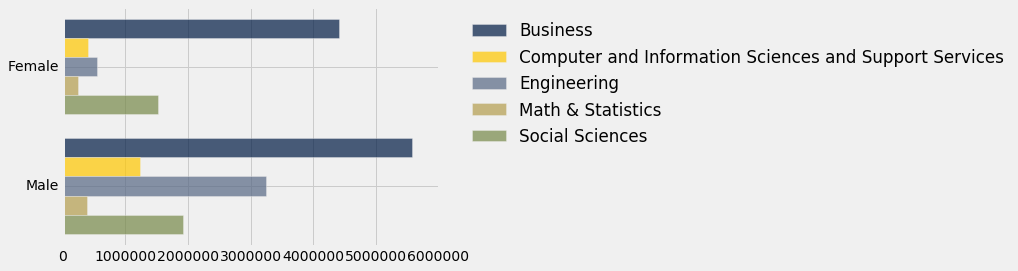

In [312]:
genders_by_major.barh(0)

In [313]:
gender_with_degree

year,College Degree,Gender,People in workforce
2014,Social Sciences,Female,1514919
2014,Social Sciences,Male,1927227
2014,Computer and Information Sciences and Support Services,Female,408543
2014,Computer and Information Sciences and Support Services,Male,1233808
2014,Engineering,Female,551436
2014,Engineering,Male,3241280
2014,Math & Statistics,Female,248930
2014,Math & Statistics,Male,392142
2014,Business,Female,4415928
2014,Business,Male,5581099


In [314]:
diffs = gender_with_degree.select([1,2,3]).group('College Degree', np.diff).drop(1)\
        .relabeled("People in workforce diff","Gender difference by college major")
diffs = Table().with_columns(["College Degree",diffs.column(0), 
                      "Gender difference by college major", np.concatenate(diffs.column(1))])
diffs

College Degree,Gender difference by college major
Business,1165171
Computer and Information Sciences and Support Services,825265
Engineering,2689844
Math & Statistics,143212
Social Sciences,412308


In [315]:
def proportions(table, count_labels):
    for label in count_labels:
        column = table.column(label) 
        table = table.with_column(label, column / sum(column)) 
        table.set_format(label, PercentFormatter(0))
    return table

proportions(genders_by_major, ["Business","Computer and Information Sciences and Support Services","Engineering","Math & Statistics","Social Sciences"])

Gender,Business,Computer and Information Sciences and Support Services,Engineering,Math & Statistics,Social Sciences
Female,44%,25%,15%,39%,44%
Male,56%,75%,85%,61%,56%


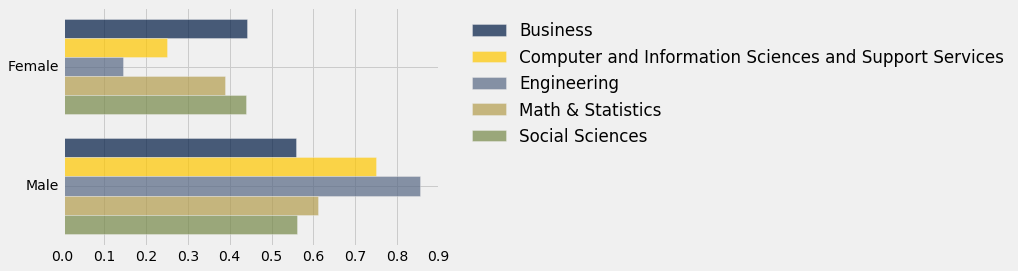

In [316]:
proportions(genders_by_major, ["Business","Computer and Information Sciences and Support Services","Engineering","Math & Statistics","Social Sciences"]).barh(0)

In [317]:
## The tvd function (from the textbook) below computes the total variation
## distance between the distributions of two conditions.
def tvd(t, conditions, values):
    """Compute the total variation distance 
    between proportions of values under two conditions.
    
    t          (Table) -- a table
    conditions (str)   -- a column label in t; should have only two categories
    values     (str)   -- a column label in t
    """
    counts = t.pivot(conditions, values)
    categoryA = np.array(counts.labels).item(1)
    categoryB = np.array(counts.labels).item(2)
    props = proportions(counts, [categoryA, categoryB])
    a = props.column(1)
    b = props.column(2)
    return 0.5*sum(abs(a - b))

tvd(age, 'sex_name', 'People in workforce')


0.82142857142857062

In [318]:
## computes the maximum deviation between the two distributions
def max_deviation(t, conditions, values):
    """Compute the maximum difference for any value
    between proportions of values under two conditions.
    
    t          (Table) -- a table
    conditions (str)   -- a column label in t; should have only two categories
    values     (str)   -- a column label in t
    """
    counts = t.pivot(conditions, values)
    categoryA = np.array(counts.labels).item(1) 
    categoryB = np.array(counts.labels).item(2) 
    props = proportions(counts, [categoryA, categoryB]) 
    a = props.column(1) 
    b = props.column(2) 
    return max(abs(a - b)) 

max_deviation(age, 'sex_name', 'People in workforce')

0.041666666666666664

Observation: 0.821428571429
Empirical P-value: 0.915


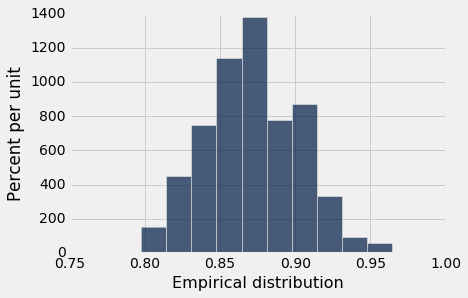

In [319]:

def permutation_test(original, conditions, values, f):
    """
    Perform a permutation test of whether 
    the distribution of values for two conditions 
    is the same in the population,
    using the function f to compute the test statistic.
    
    original is a Table with two columns.  The value of the argument
    conditions is the name of one column, and the value of the argument
    values is the name of the other column.  The conditions table should
    have only 2 possible values corresponding to 2 categories in the
    data.
    
    The values column is shuffled many times, and the data are grouped
    according to the conditions column.  The test statistic
    between the proportions values in the 2 categories is computed.  
    
    Then we draw a histogram of all those statistics.  This shows us 
    how the statistic between the two distributions would vary from
    chance, regardless of the conditions.
    """
    # Note: 200 repetitions is a little low.  We've used that number
    # so you don't have to wait too long when you run your code, but
    # if you're concerned about the accuracy of the resulting P-value,
    # feel free to increase it.
    repetitions = 200
    stats = []

    for i in np.arange(repetitions):
        shuffled = original.sample() # SOLUTION
        combined = Table().with_columns([
                conditions, original.column(conditions),
                values,     shuffled.column(values)
            ])
        stats.append(f(combined, conditions, values)) # SOLUTION    

    observation = f(original, conditions, values) # SOLUTION
    p_value = np.count_nonzero(stats >= observation) / repetitions # SOLUTION
    
    print("Observation:", observation)
    print("Empirical P-value:", p_value)
    Table([stats], ['Empirical distribution']).hist()
    
permutation_test(age, 'sex_name', 'People in workforce', tvd)


Observation: 0.0416666666667
Empirical P-value: 0.955
Observation: 0.821428571429
Empirical P-value: 0.96


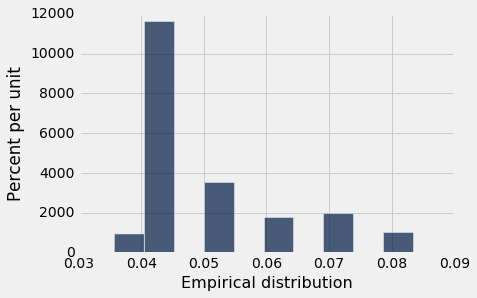

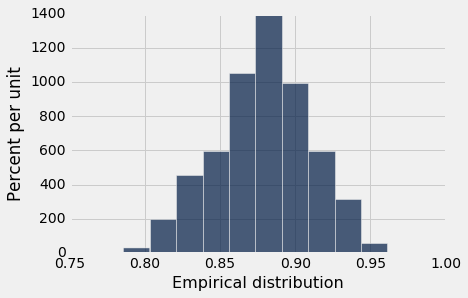

In [320]:
permutation_test(age, 'sex_name', 'People in workforce', max_deviation) # SOLUTION
permutation_test(age, 'sex_name', 'People in workforce', tvd) # SOLUTION
high_income_females_reject_null = False # SOLUTION

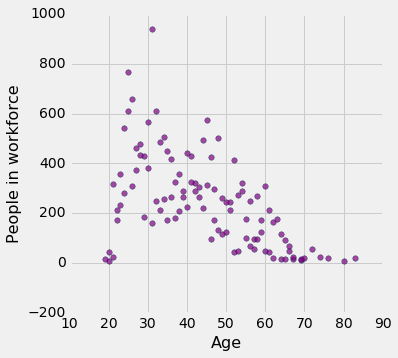

In [348]:
age.scatter("Age","People in workforce", s=30, c ="purple")

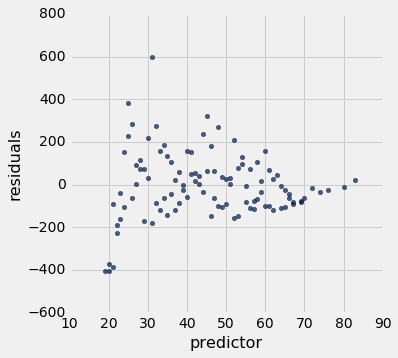

In [349]:
residual_plot(age, "Age", 'People in workforce')

In [350]:
a = slope(age, "Age", 'People in workforce') 
b = intercept(age, "Age", 'People in workforce') 
print(a, '* x +', b)

-6.58881015699 * x + 545.558922998


In [351]:
r = correlation(age, "Age", 'People in workforce') 
r

-0.55720825820410103

In [ ]:
zero_wait = b 
two_minutes_wait = a * 2 + b 
hour_wait = a * 60 + b 
print("For an eruption that lasts 0 minutes, the predicted waiting time is", zero_wait, "minutes.")
print("For an eruption that lasts 2 minutes, the predicted waiting time is", two_minutes_wait, "minutes.")
print("For an eruption that lasts an hour, the predicted waiting time is", hour_wait, "minutes.")


In [322]:
# Here are some useful functions. Just run this cell.
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):

    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def mean_squared_error(table, x, y):
    def for_line(a, b):
        estimate = a * table.column(x) + b
        return np.mean((table.column(y) - estimate) ** 2)
    return for_line

def residual_plot(table, x, y):
    fitted = fit(table, x, y)
    residuals = table.column(y) - fitted
    res_table = Table().with_columns([
            'predictor', table.column(x), 
            'residuals', residuals])
    res_table.scatter(0, 1)

    

In [321]:
# 1) A table of data, along with a description of the source and the correct interpretation of all columns
# 2) An informative tabular summary of the data, such as a contingency table or collection of descriptive statistics
# 3) An appropriate visualization of the data using a technique from the course
# 4) Prediction of one or more values using the data, such as parameter estimation, linear regression, or classification
# 5) An inferential analysis, such as a confidence interval or a hypothesis test, along with a precise inferential statement interpreting the analysis

# In addition, an independent project must include at least two of the following elements:

# 1) A second table of data, also fully described, that is joined with the first table to create a final data set
# 2) Analysis of the errors of a prediction method through a residual plot (regression) or held-out accuracy (classification)
# 3) Comparison of two different prediction techniques
# 4) An inference analysis about whether two groups of values appear to be drawn from the same distribution, such as a permutation test